### Sources: 
>https://pyimagesearch.com/2015/11/02/watershed-opencv/

>https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
import os
import cv2
import numpy as np
from skimage.feature import peak_local_max
#from skimage.morphology import watershed
from scipy import ndimage

In [28]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        print("read" + filename)
        if img is not None:
            images.append(img)
    return images
img_list = load_images_from_folder("/Users/aprilzhang/Downloads/test-images/")

read16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
read7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
read6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
read5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
readimage007.jpg
readE4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


In [29]:
shifted = cv2.pyrMeanShiftFiltering(img_list[0], 21, 51)

In [30]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [33]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, min_distance=20,labels=thresh)

In [34]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [35]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [36]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [37]:
markers = cv2.watershed(img_list[0],markers)
img_list[0][markers == -1] = [255,0,0]

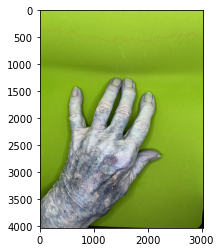

In [39]:
plt.imshow(img_list[0])